In [18]:
import pandas as pd

In [19]:
dataset = pd.read_csv('Dataset/spam_ham_dataset.csv')

In [20]:
dataset.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [22]:
dataset.shape

(5171, 4)

In [23]:
dataset.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [24]:
dataset.duplicated().sum()

0

In [25]:
dataset.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [26]:
dataset.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [27]:
dataset.describe(include='all').round(2)

,Unnamed: 0,label,text,label_num
count,5171.00,5171,5171,5171.00
unique,NaN,2,4993,NaN
top,NaN,ham,Subject: calpine daily gas nomination\r\n>\r\n...,NaN
freq,NaN,3672,20,NaN
mean,2585.00,NaN,NaN,0.29
std,1492.88,NaN,NaN,0.45
min,0.00,NaN,NaN,0.00
25%,1292.50,NaN,NaN,0.00
50%,2585.00,NaN,NaN,0.00
75%,3877.50,NaN,NaN,1.00


In [28]:
for i in dataset.columns.to_list():
    print("No of unique values in", i, ":", dataset[i].nunique())

No of unique values in Unnamed: 0 : 5171
No of unique values in label : 2
No of unique values in text : 4993
No of unique values in label_num : 2


In [29]:
dataset.rename(columns={'text': 'Emails', 'label': 'Category', 'label_num':'spam'}, inplace=True)

In [30]:
dataset.drop(columns=['Unnamed: 0'], inplace=True)

In [31]:
dataset.head(5)

,Category,Emails,spam
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

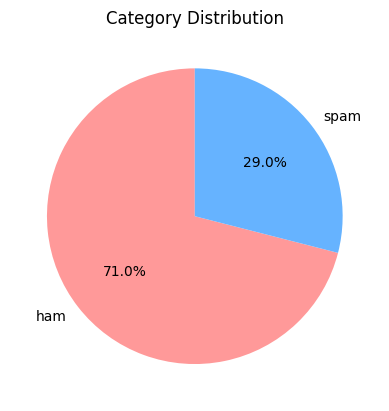

In [36]:
category = dataset['Category'].value_counts()
plt.Figure(figsize=(10, 6))
plt.pie(category, labels=category.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Category Distribution')
plt.show()

In [37]:
dataset_spam = dataset[dataset['Category'] == 'spam'].copy()

In [38]:
from wordcloud import WordCloud, STOPWORDS

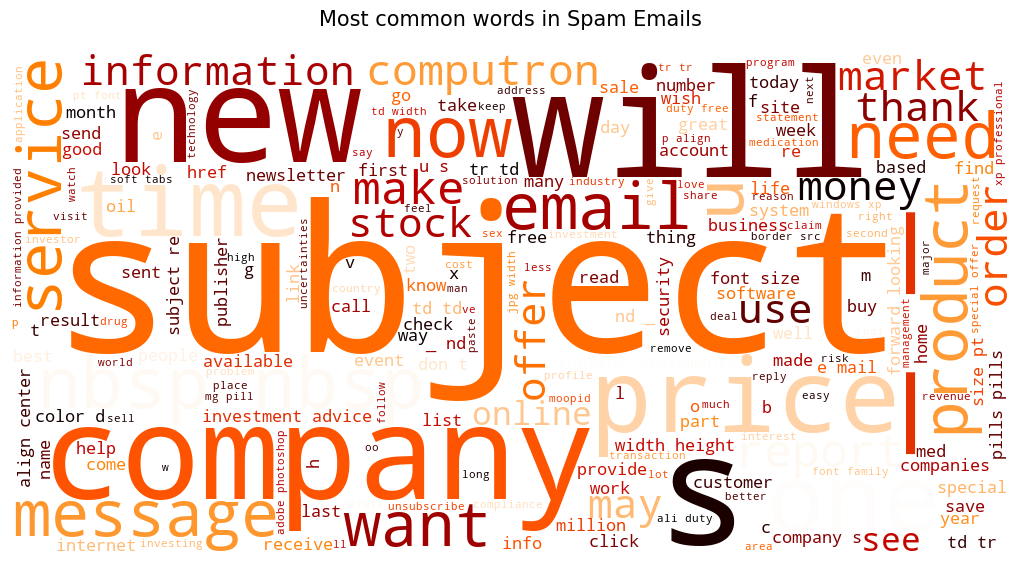

In [39]:
words = ''

stopwords = set(STOPWORDS)

for val in dataset_spam.Emails:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 1000, height = 500, background_color ='white', stopwords = stopwords, min_font_size = 10, max_words=1000, colormap='gist_heat_r').generate(words)

plt.figure(figsize=(10, 6), facecolor=None)
plt.title('Most common words in Spam Emails', fontsize=15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [41]:
X_train, X_test, y_train, y_test = train_test_split(dataset['Emails'], dataset['spam'], test_size=0.25)

Function for ML model Implementation

In [43]:
def model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    roc_auc_train = roc_auc_score(y_train, pred_prob_train)
    roc_auc_test = roc_auc_score(y_test, pred_prob_test)
    print('\n ROC AUC Train:', roc_auc_train)
    print('\n ROC AUC Test:', roc_auc_test)

    fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()


    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())

    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [44]:
clf = Pipeline([('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])


 ROC AUC Train: 0.998745989524865

 ROC AUC Test: 0.9966879307398758


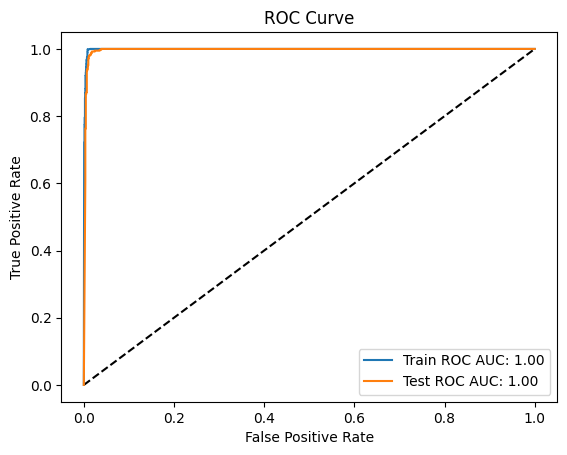


Confusion Matrix:


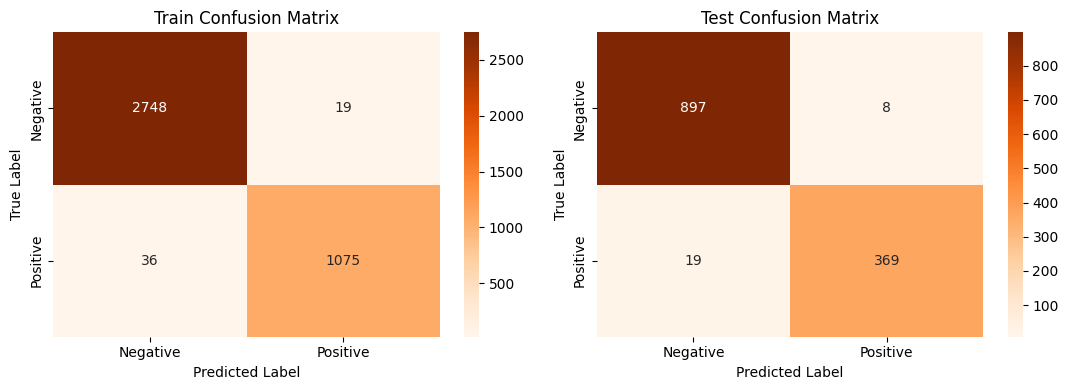


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.987069 | 0.993133 |   0.990092 | 2767        |
| 1            |    0.982633 | 0.967597 |   0.975057 | 1111        |
| accuracy     |    0.985817 | 0.985817 |   0.985817 |    0.985817 |
| macro avg    |    0.984851 | 0.980365 |   0.982574 | 3878        |
| weighted avg |    0.985798 | 0.985817 |   0.985784 | 3878        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.979258 | 0.99116  |   0.985173 |  905        |
| 1            |    0.97878  | 0.951031 |   0.964706 |  388        |
| accuracy     |    0.979118 | 0.979118 |   0.979118 |    0.979118 |
| macro avg    |    0.979019 | 0.971096 |   0.974939 | 1293        |
| weighted avg |    0.979114 | 0.979118 |   

In [46]:
MultinomialNB_score = model_predict(clf, X_train, X_test, y_train, y_test)

In [47]:
def detect_spam_mail(email):
    prediction = clf.predict([email])

    if(prediction[0] == 1):
        return "Spam"
    else:
        return "Ham"

In [52]:
email = 'Subject: You have won iphone in lottery'
result = detect_spam_mail(email)
print("Email is:", result)

Email is: Spam
